In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import genfromtxt


In [3]:
my_data = genfromtxt('Salary_Data.csv', delimiter=',',skip_header=1 )
X = np.c_[np.ones(my_data.shape[0]),my_data[:,0]]
y = np.c_[my_data[:,1]]
m = y.size 


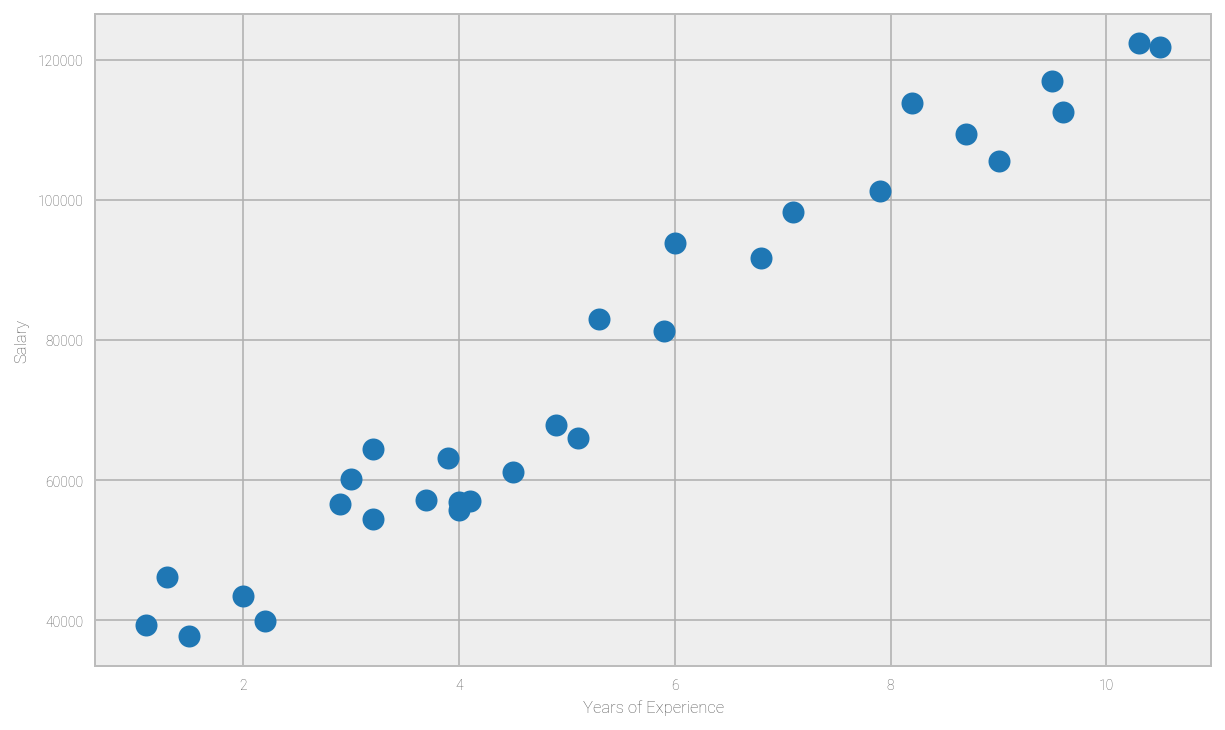

In [4]:
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'o',markersize=10)
plt.grid(True)
plt.ylabel('Salary')
plt.xlabel('Years of Experience')


In [5]:
iterations = 500
alpha = 0.01

def h(beta,X): 
    return np.dot(X,beta)
def computeCost(mybeta,X,y): 
    return float((1./(2*m)) * np.dot((h(mybeta,X)-y).T,(h(mybeta,X)-y)))

initial_beta = np.zeros((X.shape[1],1))
print (computeCost(initial_beta,X,y))


3251477635.366667


In [6]:
def descendGradient(X, beta_start = np.zeros(2)):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    """
    beta = beta_start
    xrange=range
    jvec = [] #Used to plot cost as function of iteration
    betahistory = [] #Used to visualize the minimization path later on
    for meaninglessvariable in xrange(iterations):
        tmpbeta = beta
        jvec.append(computeCost(beta,X,y))
        betahistory.append(list(beta[:,0]))
        #Simultaneously updating theta values
        for j in xrange(len(tmpbeta)):
            tmpbeta[j] = beta[j] - (alpha/m)*np.sum((h(beta,X) - y)*np.array(X[:,j]).reshape(m,1))
        beta = tmpbeta
    return beta, betahistory, jvec


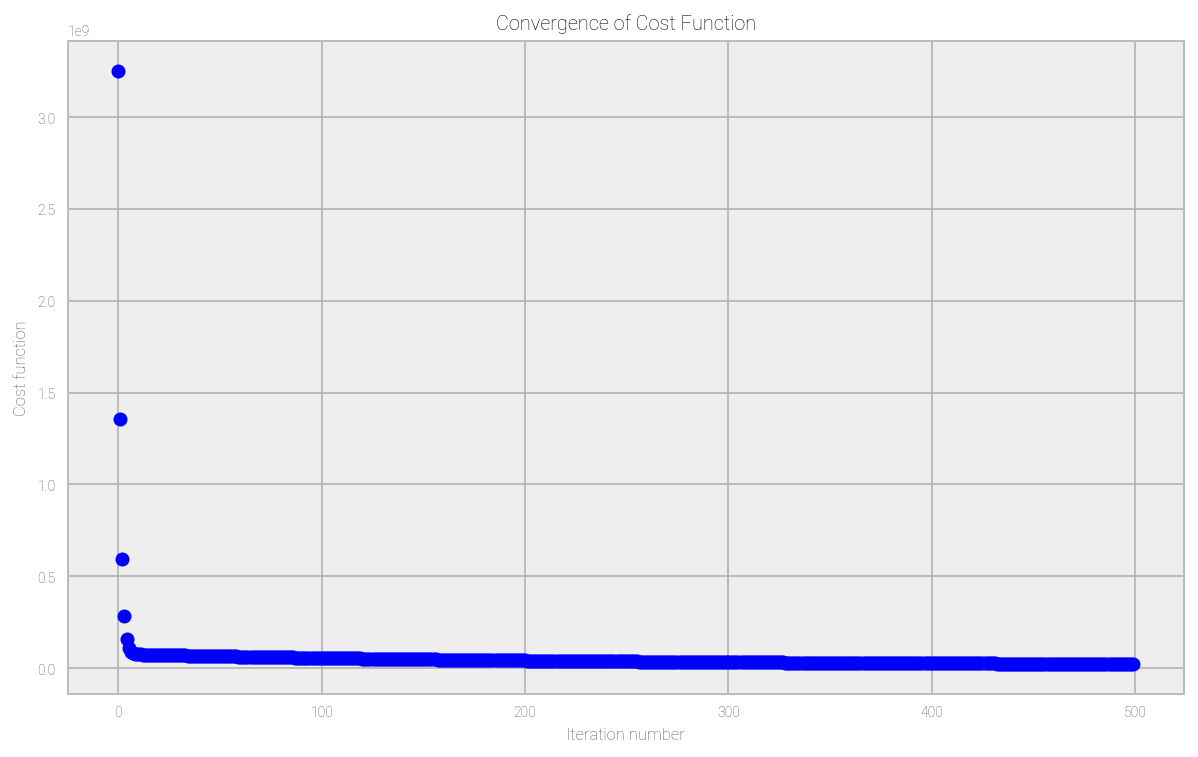

In [7]:
initial_beta = np.zeros((X.shape[1],1))
beta, thetahistory, jvec = descendGradient(X,initial_beta)

def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")

plotConvergence(jvec)


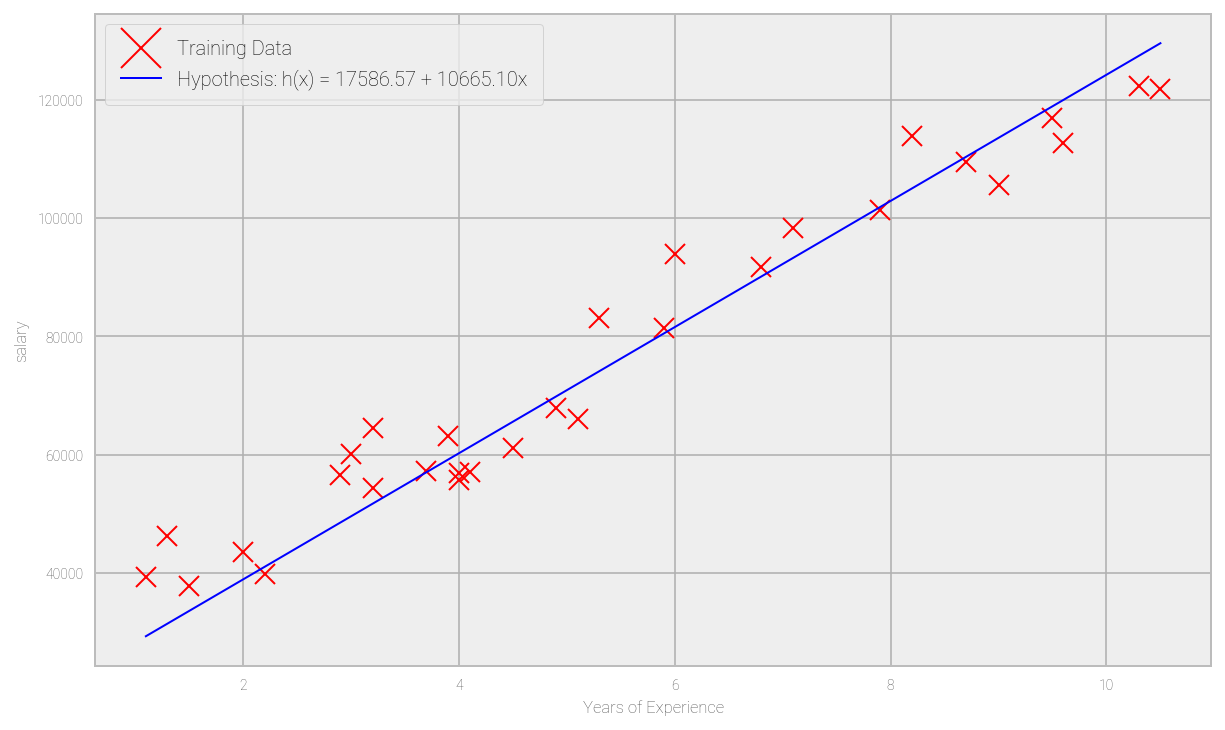

In [8]:
def myfit(xval):
    return beta[0] + beta[1]*xval
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],myfit(X[:,1]),'b-',label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(beta[0],beta[1]))
plt.grid(True) #Always plot.grid true!
plt.ylabel('salary')
plt.xlabel('Years of Experience')
plt.legend()


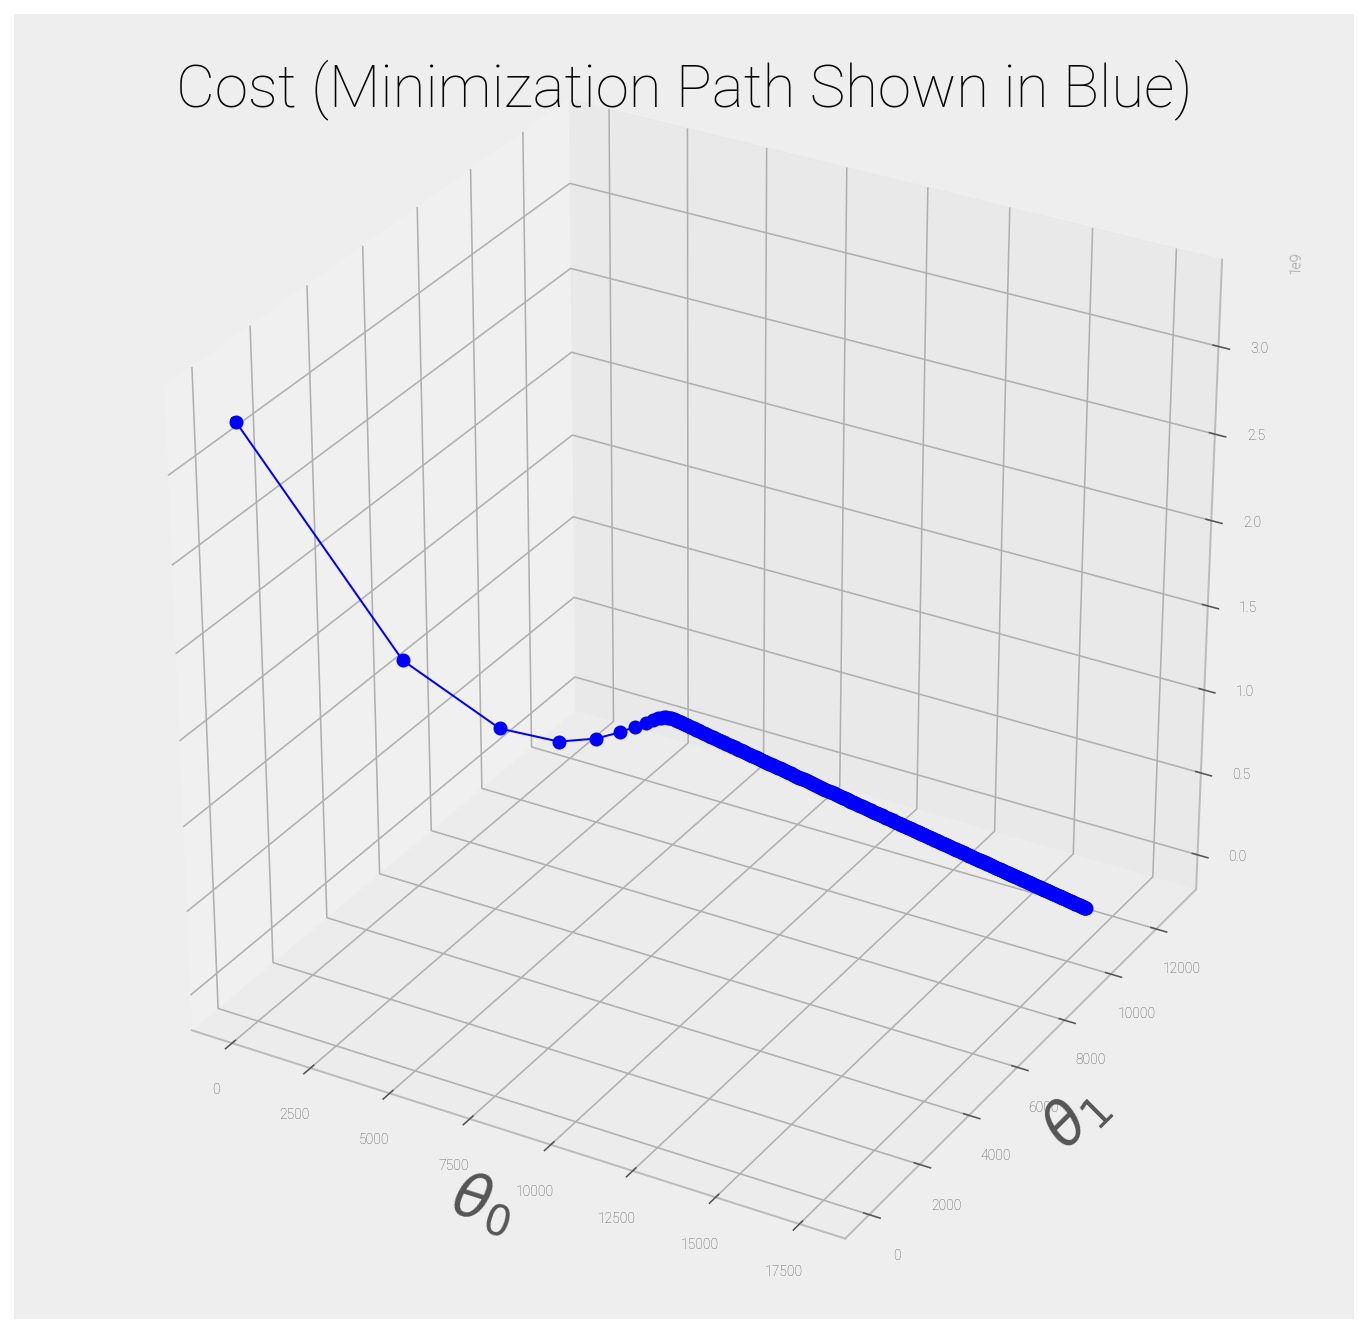

In [9]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for a in xvals:
    for b in yvals:
        myxs.append(a)
        myys.append(b)
        myzs.append(computeCost(np.array([[a], [b]]),X,y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('YlOrRd'))

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
plt.plot([x[0] for x in thetahistory],[x[1] for x in thetahistory],jvec,'bo-')
plt.show()


In [24]:
# different dataset

dataset = pd.read_csv('FuelConsumption.csv')

In [26]:
dataset.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [28]:
dataset.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


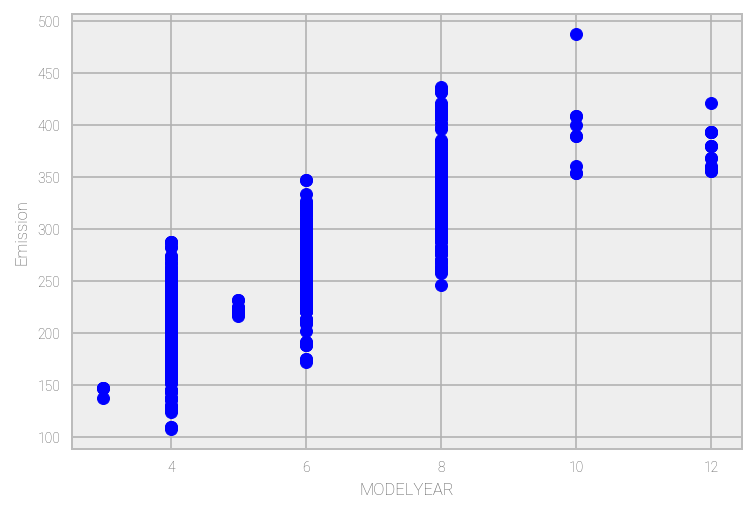

In [51]:
plt.scatter(dataset.CYLINDERS, dataset.CO2EMISSIONS,  color='blue')
plt.xlabel("MODELYEAR")
plt.ylabel("Emission")
plt.show()

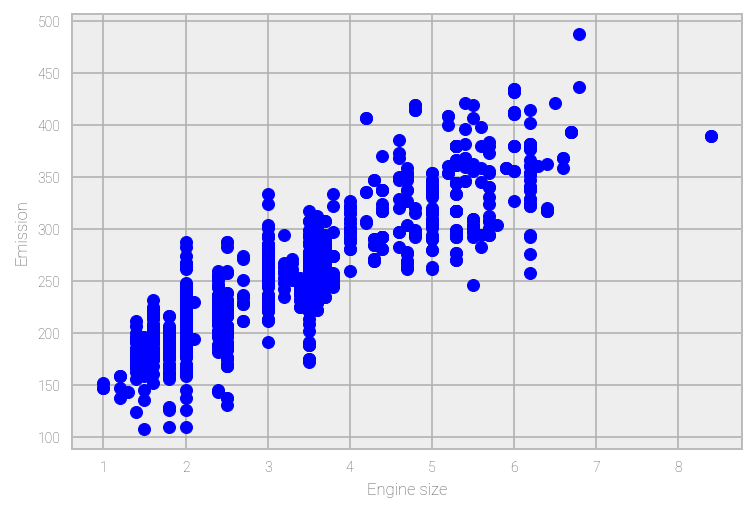

In [32]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

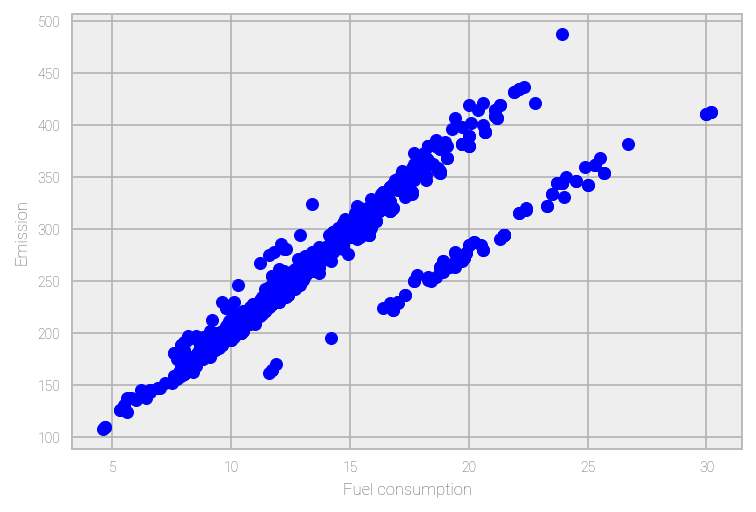

In [54]:
plt.scatter(dataset.FUELCONSUMPTION_CITY, dataset.CO2EMISSIONS,  color='blue')
plt.xlabel("Fuel consumption")
plt.ylabel("Emission")
plt.show()

In [71]:
X= dataset['ENGINESIZE']
y= dataset['CO2EMISSIONS']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
x_train_new= X_train.reshape(-1,1)
y_train_new= y_train.reshape(-1,1)
x_test_new= X_test.reshape(-1,1)
y_test_new= y_test.reshape(-1,1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [72]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_new, y_train_new)
print ('Coefficients: ', regressor.coef_)
print ('Intercept: ',regressor.intercept_)

Coefficients:  [[38.99297872]]
Intercept:  [126.28970217]


In [73]:
from sklearn.metrics import r2_score

predict_test = regressor.predict(x_test_new)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predict_test - y_test_new )))
print("Residual sum of squares (MSE): %.2f" % np.mean((predict_test - y_test_new) ** 2))
print("R2-score: %.2f" % r2_score(predict_test , y_test_new) )

Mean absolute error: 24.10
Residual sum of squares (MSE): 985.94
R2-score: 0.68


In [78]:
#multiple regression

x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regressor.fit (x, y)
# The coefficients
print ('Coefficients: ', regressor.coef_)

Coefficients:  [[10.66895612  7.95198443  9.51197092]]


In [80]:
y_hat= regressor.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regressor.score(x, y))

Residual sum of squares: 435.97
Variance score: 0.87
